In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate 1,000 points in two interleaving half-circles
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)          # logits for binary classification
        )
    def forward(self, x):
        return self.net(x)

model = SimpleNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [3]:
# Convert to torch tensors
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).unsqueeze(1).float()

for epoch in range(200):
    optimizer.zero_grad()
    logits = model(X_train_t)
    loss = criterion(logits, y_train_t)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d}  Loss: {loss.item():.4f}")

Epoch 000  Loss: 0.6914
Epoch 050  Loss: 0.6134
Epoch 100  Loss: 0.4845
Epoch 150  Loss: 0.3613


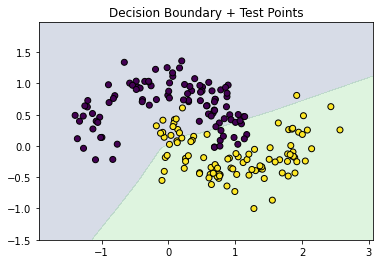

In [4]:
import matplotlib.pyplot as plt

# Grid over feature space
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
with torch.no_grad():
    preds = torch.sigmoid(model(torch.from_numpy(grid).float())).numpy().reshape(xx.shape)

# Plot
plt.contourf(xx, yy, preds, levels=[0,0.5,1], alpha=0.2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k')
plt.title("Decision Boundary + Test Points")
plt.show()

In [5]:
from sklearn.metrics import accuracy_score

# Predict on test set
with torch.no_grad():
    test_logits = model(torch.from_numpy(X_test).float())
    test_preds = (torch.sigmoid(test_logits) > 0.5).numpy().astype(int).ravel()

print("Test Accuracy:", accuracy_score(y_test, test_preds))

Test Accuracy: 0.87
